In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt


In [33]:
# Charger les données en spécifiant le délimiteur
data_red = pd.read_csv("./data/winequality-red.csv", delimiter=";")
data_white = pd.read_csv("./data/winequality-white.csv")



In [34]:
print(data_red.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [28]:
print(data_red.columns)


Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')


In [38]:
import numpy as np

# Diviser en ensembles d'entraînement et de test 

X_red = data_red.drop('quality', axis=1)
y_red = data_red['quality']
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Convertir les données en tableaux 

X_train_red_np = np.array(X_train_red)
y_train_red_np = np.array(y_train_red)

# Initialiser et entraîner le modèle LassoCV pour le vin rouge

lasso_model_red = LassoCV(cv=5)
lasso_model_red.fit(X_train_red_np, y_train_red_np)

# Prédire les valeurs sur l'ensemble de test

X_test_red_np = np.array(X_test_red)
y_pred_red = lasso_model_red.predict(X_test_red_np)

mse_red = mean_squared_error(y_test_red, y_pred_red)
r2_red = r2_score(y_test_red, y_pred_red)

# Afficher les résultats
print("Mean Squared Error (MSE) pour le vin rouge :", mse_red)
print("Coefficient de détermination (R^2) pour le vin rouge :", r2_red)


Mean Squared Error (MSE) pour le vin rouge : 0.408562596251924
Coefficient de détermination (R^2) pour le vin rouge : 0.37481418048391324


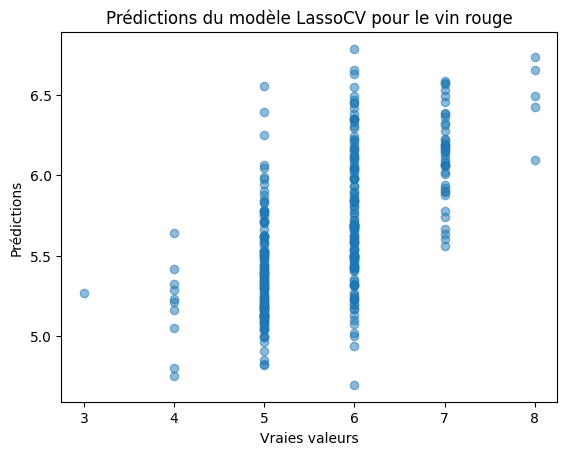

In [39]:
# Comparaison entre les prédictions et les valeurs réelles pour le vin rouge

plt.scatter(y_test_red, y_pred_red, alpha=0.5)
plt.xlabel("Vraies valeurs")
plt.ylabel("Prédictions")
plt.title("Prédictions du modèle LassoCV pour le vin rouge")
plt.show()


In [41]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser
param_grid = {
    'alphas': [[0.1, 0.5, 1.0, 2.0]],  
    'cv': [3, 5, 7], 
}

# Initialisation le modèle LassoCV

lasso_model_red_optimized = LassoCV()

#  Pour rechercher par grille
grid_search = GridSearchCV(lasso_model_red_optimized, param_grid, scoring='neg_mean_squared_error', cv=5)

# Effectuer la recherche par grille 
grid_search.fit(X_train_red_np, y_train_red_np)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

y_pred_red_optimized = grid_search.predict(X_test_red_np)

# Évaluation de résultat
mse_red_optimized = mean_squared_error(y_test_red, y_pred_red_optimized)
r2_red_optimized = r2_score(y_test_red, y_pred_red_optimized)

# Affichage des résultats
print("Mean Squared Error (MSE) pour le modèle optimisé :", mse_red_optimized)
print("Coefficient de détermination (R^2) pour le modèle optimisé :", r2_red_optimized)


Meilleurs hyperparamètres : {'alphas': [0.1, 0.5, 1.0, 2.0], 'cv': 3}
Mean Squared Error (MSE) pour le modèle optimisé : 0.4986751630744773
Coefficient de détermination (R^2) pour le modèle optimisé : 0.23692319522368133
